# In the last Notebook, I had a specific question: _Why Remote workers earn more than In-Person?_ I will try to solve it

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)
pd.options.display.float_format='{:,.2f}'.format


In [2]:
df = pd.read_pickle('../data/interim/Remote_vs_InPerson.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3129 entries, 110 to 87954
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3129 non-null   object 
 1   BuyNewTool         2963 non-null   object 
 2   Country            3129 non-null   object 
 3   CoursesCert        1112 non-null   object 
 4   CurrentJob         3128 non-null   object 
 5   EdLevel            3129 non-null   object 
 6   Employment         3129 non-null   object 
 7   Industry           1884 non-null   object 
 8   MainBranch         3129 non-null   object 
 9   OSPersonal         3100 non-null   object 
 10  OSProffesional     2966 non-null   object 
 11  ProfessionalTech   2154 non-null   object 
 12  RemoteWork         3129 non-null   object 
 13  TargetAIDeveloper  733 non-null    object 
 14  TargetAISearch     1505 non-null   object 
 15  TargetCollabTools  2760 non-null   object 
 16  TargetDatabase     2166 no

In [4]:
df.head()

,Age,BuyNewTool,Country,CoursesCert,CurrentJob,EdLevel,Employment,Industry,MainBranch,OSPersonal,OSProffesional,ProfessionalTech,RemoteWork,TargetAIDeveloper,TargetAISearch,...,WorkedCollabTools,WorkedDatabase,WorkedFramework,WorkedLanguage,WorkedLibraries,WorkedPlatform,WorkedTools,WorkingYears,YearlySalary,YearsCode,YearsCodePro,z_BenefitsAI,z_FavorableAI,z_TrustAI,z_UsingAI
110,25-34 years old,Start a free trial;Ask developers I know/work ...,United States of America,Codecademy;Udemy;Pluralsight;Udacity,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",NaN,I am a developer by profession,Ubuntu;Windows;Windows Subsystem for Linux (WSL),Debian;Fedora;Ubuntu;Windows,None of these,In-person,NaN,ChatGPT,...,Notepad++;Sublime Text;Vim;Visual Studio Code,Firebase Realtime Database;MongoDB,Angular;AngularJS;Node.js;Vue.js,HTML/CSS;JavaScript;Python;TypeScript,NaN,NaN,npm,7.00,"145,000.00",12.00,7.00,Increase productivity;Greater efficiency,Favorable,Neither trust nor distrust,Yes
798,25-34 years old,Start a free trial;Ask developers I know/work ...,United States of America,NaN,"Developer, full-stack",Some college/university study without earning ...,"Employed, full-time","Manufacturing, Transportation, or Supply Chain",I am a developer by profession,Windows,Windows,None of these,In-person,NaN,NaN,...,Eclipse;Notepad++;Visual Studio Code,Microsoft Access;PostgreSQL,NaN,Python;SQL;VBA;Visual Basic (.Net),.NET Framework (1.0 - 4.8);Pandas,NaN,Pip,15.00,"50,000.00",9.00,6.00,NaN,NaN,NaN,"No, and I don't plan to"
1102,25-34 years old,Start a free trial;Ask developers I know/work ...,United States of America,edX;Pluralsight,Hardware Engineer,Some college/university study without earning ...,"Employed, full-time","Manufacturing, Transportation, or Supply Chain","I am not primarily a developer, but I write co...",Ubuntu;Windows;Windows Subsystem for Linux (WSL),Debian;Windows;Windows Subsystem for Linux (WSL),None of these,In-person,GitHub Copilot,NaN,...,IPython;Jupyter Notebook/JupyterLab;Notepad++;...,SQLite,NaN,C#;C++;Python;Visual Basic (.Net),.NET (5+) ;.NET Framework (1.0 - 4.8);Opencv,NaN,MSBuild;NuGet;Pip;Visual Studio Solution,5.00,"40,000.00",9.00,5.00,NaN,Favorable,Somewhat trust,"No, but I plan to soon"
1113,25-34 years old,Ask developers I know/work with;Visit develope...,United States of America,NaN,"Developer, desktop or enterprise applications",Something else,"Employed, full-time","Manufacturing, Transportation, or Supply Chain",I am a developer by profession,Android;Windows;Windows Subsystem for Linux (WSL),Debian;Ubuntu;Windows,Automated testing;Developer portal or other ce...,In-person,NaN,NaN,...,Atom;Notepad++;PyCharm;Visual Studio Code,Microsoft SQL Server,NaN,C;JavaScript;Kotlin;Python;Rust;SQL,NaN,NaN,Pip,5.00,"110,000.00",6.00,5.00,NaN,NaN,NaN,"No, and I don't plan to"
1421,25-34 years old,Start a free trial;Ask developers I know/work ...,United States of America,Pluralsight,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time;Independent contractor, fr...",NaN,I am a developer by profession,iOS;iPadOS;MacOS;Windows,Windows,DevOps function;Microservices,In-person,NaN,Bing AI;ChatGPT;Google Bard AI,...,Android Studio;Notepad++;Visual Studio Code;Xcode,Microsoft Access;Microsoft SQL Server,Angular;AngularJS;ASP.NET;ASP.NET CORE,C#;Dart;HTML/CSS;JavaScript;TypeScript;VBA;Vis...,.NET (5+) ;.NET Framework (1.0 - 4.8);Flutter;...,NaN,Chocolatey;Gradle;Homebrew;npm,9.00,"130,000.00",12.00,9.00,NaN,Favorable,Neither trust nor distrust,"No, but I plan to soon"


In [5]:
df.groupby('RemoteWork').count()

,Age,BuyNewTool,Country,CoursesCert,CurrentJob,EdLevel,Employment,Industry,MainBranch,OSPersonal,OSProffesional,ProfessionalTech,TargetAIDeveloper,TargetAISearch,TargetCollabTools,...,WorkedCollabTools,WorkedDatabase,WorkedFramework,WorkedLanguage,WorkedLibraries,WorkedPlatform,WorkedTools,WorkingYears,YearlySalary,YearsCode,YearsCodePro,z_BenefitsAI,z_FavorableAI,z_TrustAI,z_UsingAI
RemoteWork,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
In-person,471,446,471,151,471,471,471,275,471,467,440,303,89,211,419,...,467,357,326,470,325,296,431,315,471,471,471,166,270,270,471
Remote,2658,2517,2658,961,2657,2658,2658,1609,2658,2633,2526,1851,644,1294,2341,...,2643,2343,2194,2653,1705,2326,2497,1892,2658,2654,2651,1157,1765,1761,2658


Okey, as all people in my df are Americans between 25-34 years, I will get rid of these columns, as well as the Worked and Target things, because as we saw, they will not help me too much. I want to clean the data

In [6]:
df2 = df.drop(['Age','Country','TargetAIDeveloper','TargetAISearch','TargetCollabTools','TargetDatabase',
        'TargetFramework','TargetLanguage','TargetLibraries','TargetPlatform','TargetTools','WorkedAIDeveloper',
        'WorkedAISearch','WorkedCollabTools','WorkedDatabase','WorkedFramework','WorkedLanguage',
        'WorkedLibraries','WorkedPlatform','WorkedTools'], axis='columns')

In [7]:
df2.query('RemoteWork=="Remote"').describe()

,WorkingYears,YearlySalary,YearsCode,YearsCodePro
count,"1,892.00","2,658.00","2,654.00","2,651.00"
mean,7.83,"162,516.27",11.13,6.93
std,3.63,"88,801.33",4.50,3.35
min,0.00,1.00,0.00,0.00
25%,5.00,"113,000.00",8.00,5.00
50%,8.00,"150,000.00",11.00,7.00
75%,10.00,"190,000.00",14.00,10.00
max,26.00,"1,200,000.00",29.00,21.00


In [8]:
df2.query('RemoteWork=="In-person"').describe()

,WorkingYears,YearlySalary,YearsCode,YearsCodePro
count,315.00,471.00,471.00,471.00
mean,6.39,"130,546.63",10.26,5.49
std,3.77,"103,360.87",4.79,3.51
min,0.00,"17,000.00",0.00,0.00
25%,3.00,"75,000.00",7.00,3.00
50%,6.00,"106,000.00",10.00,5.00
75%,9.00,"142,060.00",13.00,8.00
max,17.00,"1,250,000.00",26.00,17.00


If both groups have the same range of ages, why the median in Remote Workers is over 2 years Working and coding professionally?? The Yearly salary is like 50% more!

An interest insight! Remote Workers are working 15% more in Technology. The slight difference between the "Other" Industry is a factor too. Remote Workers are working 3 times fewer in Manufacturing Industry. I think this will be an important feature to respond why In-person people are earning less.

In [9]:
df2['Industry'].value_counts().nlargest()

Industry
Information Services, IT, Software Development, or other Technology    718
Other                                                                  265
Financial Services                                                     245
Healthcare                                                             186
Manufacturing, Transportation, or Supply Chain                         160
Name: count, dtype: int64

In [10]:
df_top_industry = df2.loc[df['Industry'].isin(df['Industry'].value_counts().nlargest().index)]

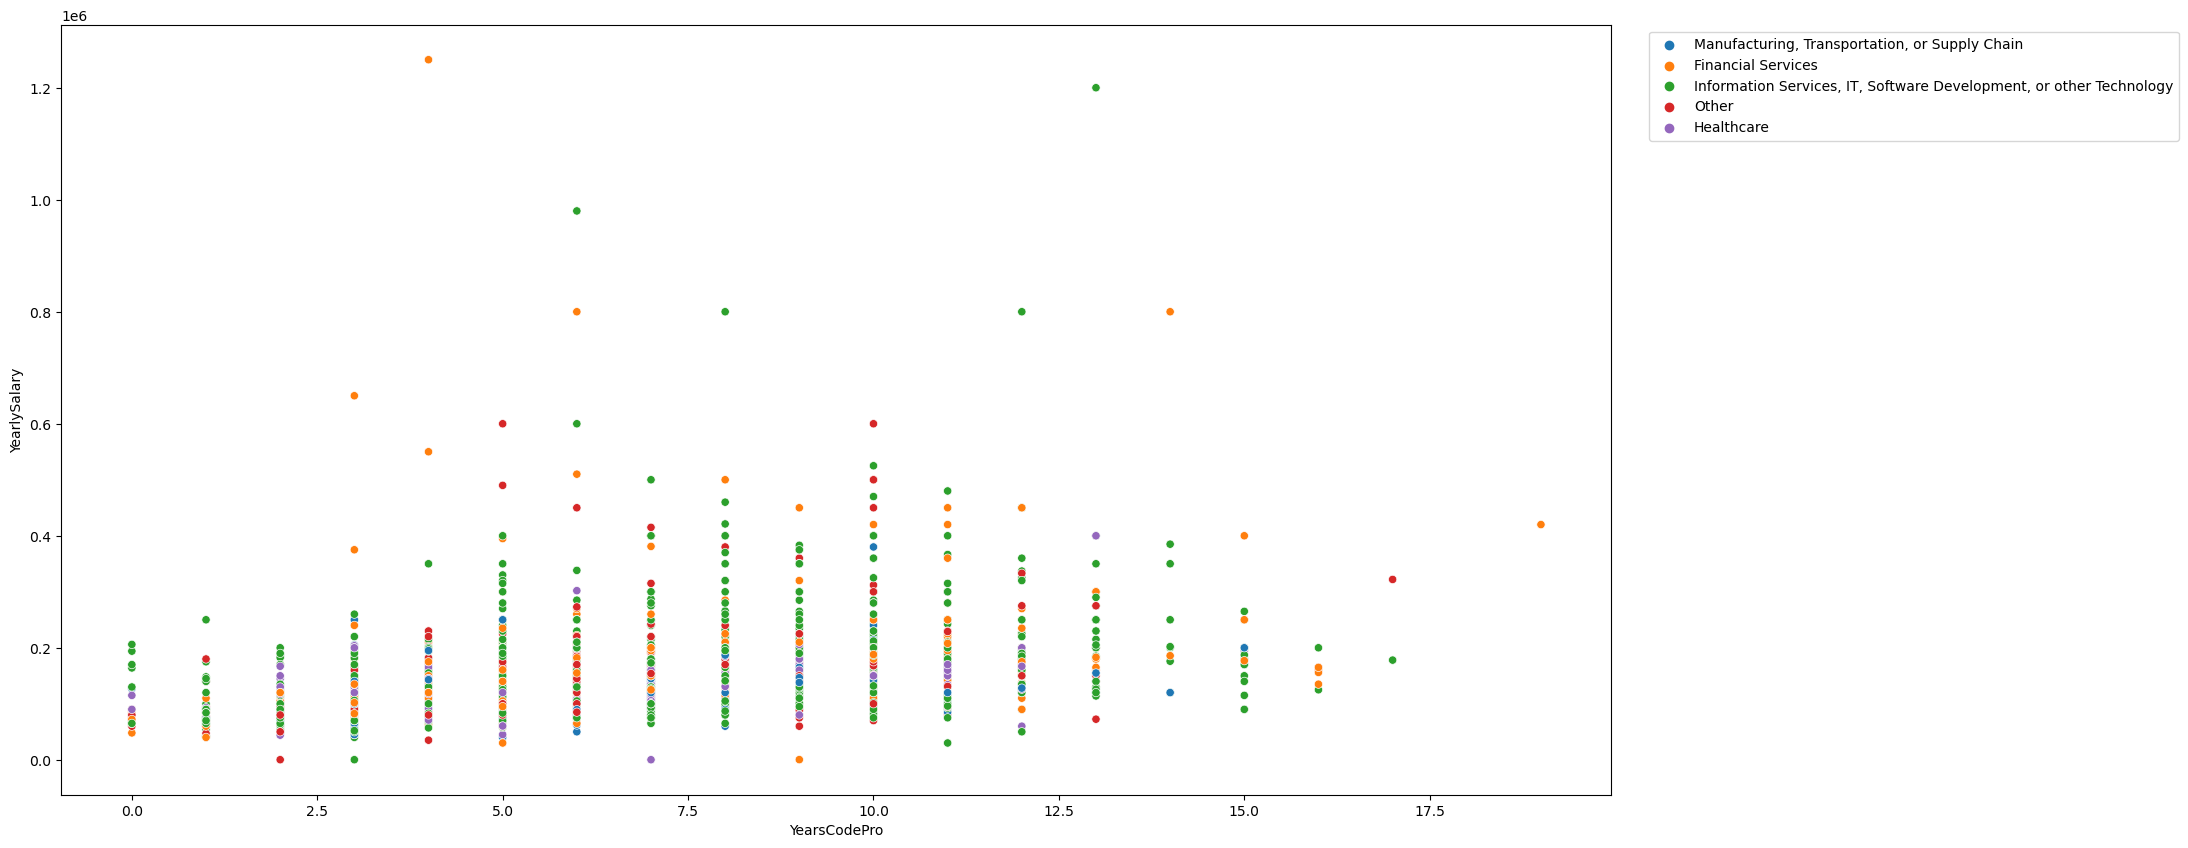

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_top_industry, x='YearsCodePro' ,y='YearlySalary', hue='Industry')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

In [12]:
df2.query("Industry=='Information Services, IT, Software Development, or other Technology'")['YearlySalary'].mean()

175106.58217270195

In [13]:
df2.query("Industry=='Manufacturing, Transportation, or Supply Chain'")['YearlySalary'].mean()

124076.04375

This is a big difference

# Okey, the reason why we are here. *Our Classification Model*

In the last notebook, I had a specific question: Why remote workers, having the same age and living in the United States, with the same years experience, are earning more than In-person workers? I asked it to ChatGPT in the last Notebook, but I want to put in practice this interesting tool, this superpower! **Logistic Regression**

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3129 entries, 110 to 87954
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BuyNewTool        2963 non-null   object 
 1   CoursesCert       1112 non-null   object 
 2   CurrentJob        3128 non-null   object 
 3   EdLevel           3129 non-null   object 
 4   Employment        3129 non-null   object 
 5   Industry          1884 non-null   object 
 6   MainBranch        3129 non-null   object 
 7   OSPersonal        3100 non-null   object 
 8   OSProffesional    2966 non-null   object 
 9   ProfessionalTech  2154 non-null   object 
 10  RemoteWork        3129 non-null   object 
 11  WorkingYears      2207 non-null   float64
 12  YearlySalary      3129 non-null   float64
 13  YearsCode         3125 non-null   float64
 14  YearsCodePro      3122 non-null   float64
 15  z_BenefitsAI      1323 non-null   object 
 16  z_FavorableAI     2035 non-null   object 
 1

My purpose here, is gonna be transform the RemoteWork column having dtype object, to a boolean dtype. As it will be my target column, the Remote workers will be "1" and In-person will be "0". After this, I'll do a quick data cleaning and EDA. 

In [15]:
df2['RemoteWork'].value_counts()

RemoteWork
Remote       2658
In-person     471
Name: count, dtype: int64

In [16]:
df3 = df2.copy()
df3['RemoteWork'] = df3['RemoteWork'].apply(lambda x: 1 if x=='Remote' else 0)

In [17]:
df3.isna().sum()

BuyNewTool           166
CoursesCert         2017
CurrentJob             1
EdLevel                0
Employment             0
Industry            1245
MainBranch             0
OSPersonal            29
OSProffesional       163
ProfessionalTech     975
RemoteWork             0
WorkingYears         922
YearlySalary           0
YearsCode              4
YearsCodePro           7
z_BenefitsAI        1806
z_FavorableAI       1094
z_TrustAI           1098
z_UsingAI              0
dtype: int64

1. I will drop the columns which will not help me. Those with too many null values. 

In [18]:
# This is gonna be an interesting feature
df3['z_UsingAI'].value_counts()

z_UsingAI
Yes                        1330
No, and I don't plan to    1094
No, but I plan to soon      705
Name: count, dtype: int64

In [19]:
df3['ProfessionalTech'].value_counts()

ProfessionalTech
DevOps function;Microservices;Automated testing;Observability tools;Developer portal or other central places to find tools/services;Continuous integration (CI) and (more often) continuous delivery    171
DevOps function;Microservices;Automated testing;Observability tools;Continuous integration (CI) and (more often) continuous delivery                                                                    164
None of these                                                                                                                                                                                           160
DevOps function;Automated testing;Continuous integration (CI) and (more often) continuous delivery                                                                                                       89
DevOps function;Automated testing;Observability tools;Continuous integration (CI) and (more often) continuous delivery                                                 

In [20]:
df4 = df3.drop(['CoursesCert','z_BenefitsAI','z_FavorableAI','z_TrustAI','ProfessionalTech'], axis='columns')

In [21]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3129 entries, 110 to 87954
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BuyNewTool      2963 non-null   object 
 1   CurrentJob      3128 non-null   object 
 2   EdLevel         3129 non-null   object 
 3   Employment      3129 non-null   object 
 4   Industry        1884 non-null   object 
 5   MainBranch      3129 non-null   object 
 6   OSPersonal      3100 non-null   object 
 7   OSProffesional  2966 non-null   object 
 8   RemoteWork      3129 non-null   int64  
 9   WorkingYears    2207 non-null   float64
 10  YearlySalary    3129 non-null   float64
 11  YearsCode       3125 non-null   float64
 12  YearsCodePro    3122 non-null   float64
 13  z_UsingAI       3129 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 366.7+ KB


In [22]:
df4['z_UsingAI'] = df4['z_UsingAI'].apply(lambda x: 1 if x=='Yes' else 0)

In [23]:
df4['OSProffesional'].value_counts()

OSProffesional
MacOS                                                                          917
Windows                                                                        459
MacOS;Ubuntu                                                                   134
Ubuntu                                                                         128
Windows;Windows Subsystem for Linux (WSL)                                      114
                                                                              ... 
Android;iOS;iPadOS;MacOS;Other Linux-based                                       1
Debian;iOS;MacOS;Other Linux-based;Ubuntu;Windows Subsystem for Linux (WSL)      1
Debian;Other Linux-based;Ubuntu;Windows                                          1
Android;MacOS;Windows                                                            1
Fedora;MacOS;Red Hat                                                             1
Name: count, Length: 327, dtype: int64

In [24]:
df4['Industry'].value_counts()

Industry
Information Services, IT, Software Development, or other Technology    718
Other                                                                  265
Financial Services                                                     245
Healthcare                                                             186
Manufacturing, Transportation, or Supply Chain                         160
Retail and Consumer Services                                           117
Insurance                                                               65
Advertising Services                                                    63
Higher Education                                                        38
Legal Services                                                          11
Oil & Gas                                                               10
Wholesale                                                                6
Name: count, dtype: int64

In [25]:
df4['Industry'] = df4['Industry'].fillna('Not_Responded')

In [26]:
top_industry = df4['Industry'].value_counts().nlargest(7).index
df5 = df4.copy()
df5['Industry'] = df5['Industry'].apply(lambda x: x if x in top_industry else 'Other')

In [27]:
df5['Industry'].value_counts()

Industry
Not_Responded                                                          1245
Information Services, IT, Software Development, or other Technology     718
Other                                                                   458
Financial Services                                                      245
Healthcare                                                              186
Manufacturing, Transportation, or Supply Chain                          160
Retail and Consumer Services                                            117
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Not_Responded'),
  Text(1, 0, 'Manufacturing, Transportation, or Supply Chain'),
  Text(2, 0, 'Retail and Consumer Services'),
  Text(3, 0, 'Financial Services'),
  Text(4, 0, 'Information Services, IT, Software Development, or other Technology'),
  Text(5, 0, 'Other'),
  Text(6, 0, 'Healthcare')])

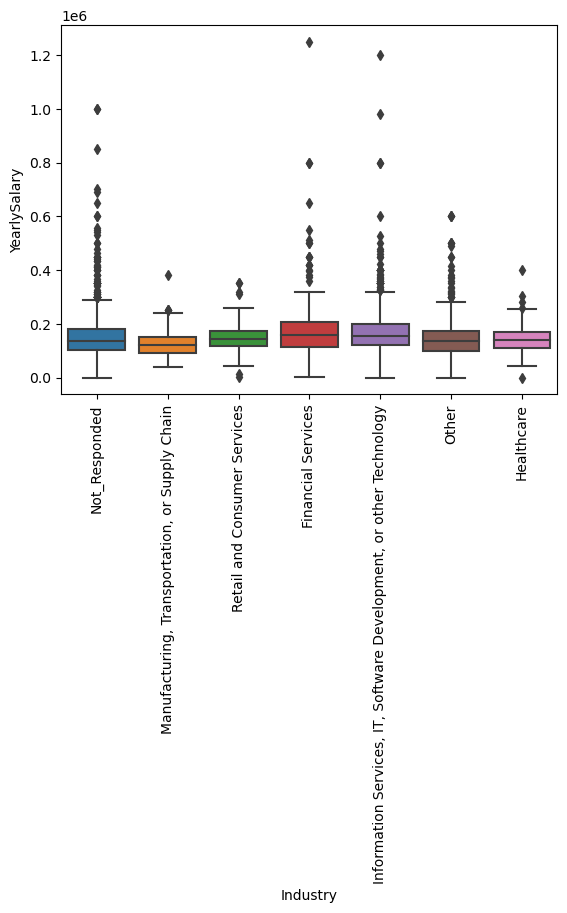

In [28]:
sns.boxplot(data=df5, x='Industry',y='YearlySalary')
plt.xticks(rotation=90)

In [29]:
df['YearlySalary'].describe()

count       3,129.00
mean      157,703.97
std        91,838.29
min             1.00
25%       105,000.00
50%       140,000.00
75%       185,000.00
max     1,250,000.00
Name: YearlySalary, dtype: float64

In [30]:
(df['YearlySalary'] < 400000).sum()

3050

In [31]:
df6 = df5.loc[df['YearlySalary'] < 400000]

In [32]:
df6['Industry'] = df6['Industry'].apply(lambda x: 'Technology' if x=='Information Services, IT, Software Development, or other Technology' else x)
df6['Industry'] = df6['Industry'].apply(lambda x: 'Manufacturing' if x=='Manufacturing, Transportation, or Supply Chain' else x)
df6['Industry'] = df6['Industry'].apply(lambda x: 'Retail' if x=='Retail and Consumer Services' else x)

/var/folders/xf/nkmp0gn94v1bjxp47j6nsslc0000gp/T/ipykernel_13112/3243348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Industry'] = df6['Industry'].apply(lambda x: 'Technology' if x=='Information Services, IT, Software Development, or other Technology' else x)
/var/folders/xf/nkmp0gn94v1bjxp47j6nsslc0000gp/T/ipykernel_13112/3243348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Industry'] = df6['Industry'].apply(lambda x: 'Manufacturing' if x=='Manufacturing, Transportation, or Supply C

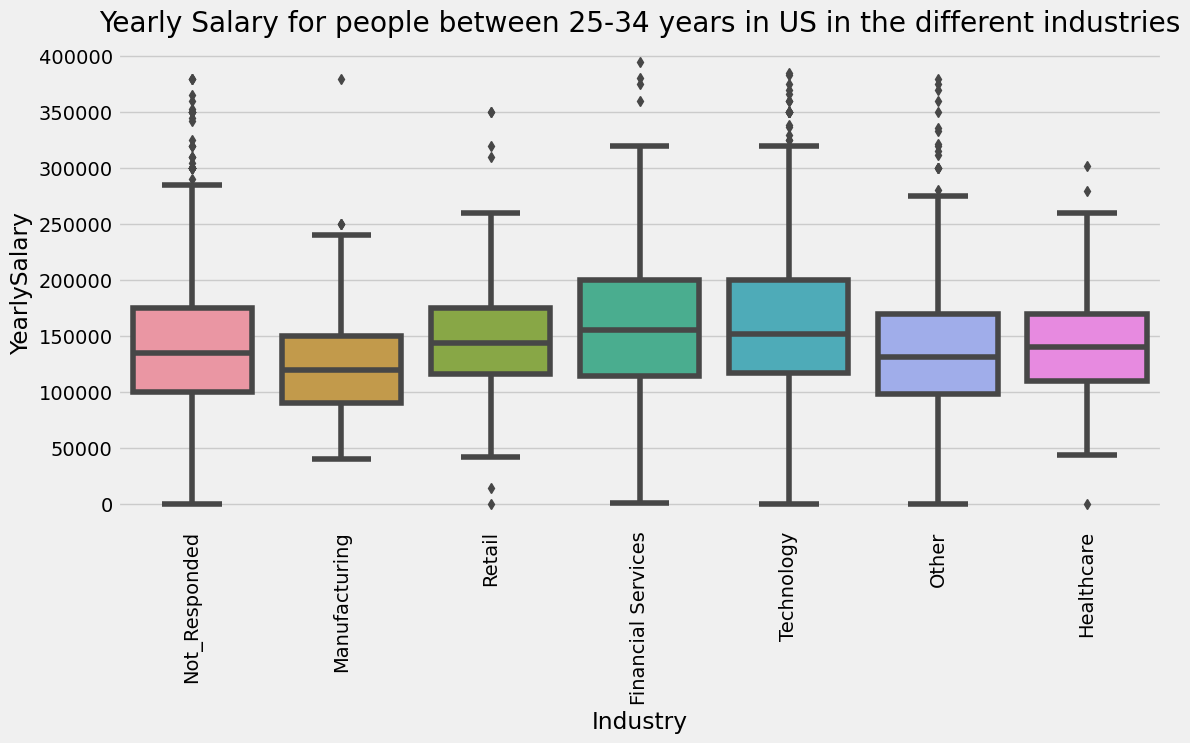

In [33]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
sns.boxplot(data=df6, x='Industry',y='YearlySalary')
plt.title('Yearly Salary for people between 25-34 years in US in the different industries')
plt.xticks(rotation=90)
plt.show()


Perfect. People in Financial Services and Technology are earning more than the other ones. Even compared with the "Not_Responded" and "Other" columns

## Now, I want to see the difference between the remote and in-person workers with the same graph

In [34]:
df6_Remote = df6.query("RemoteWork == 1")

In [35]:
df6_inperson = df6.query("RemoteWork == 0")

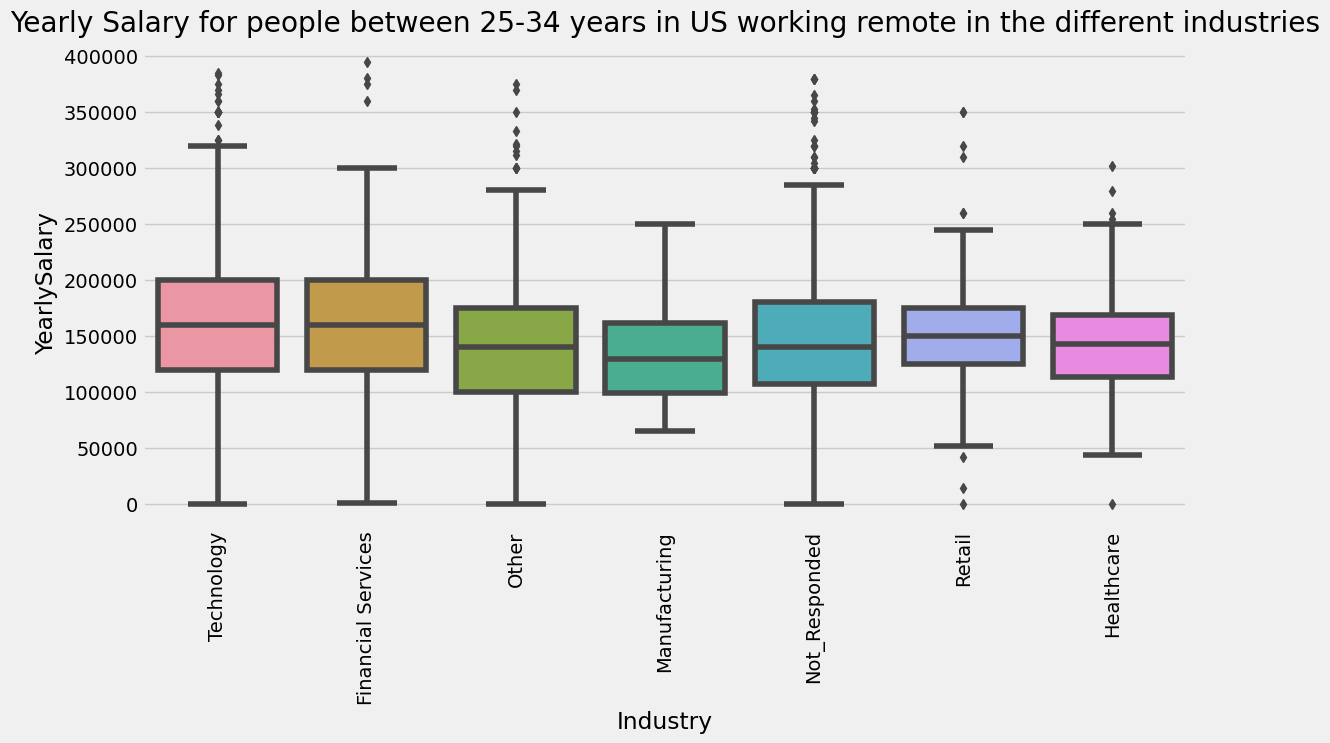

In [36]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
sns.boxplot(data=df6_Remote, x='Industry',y='YearlySalary')
plt.title('Yearly Salary for people between 25-34 years in US working remote in the different industries')
plt.xticks(rotation=90)
plt.show()


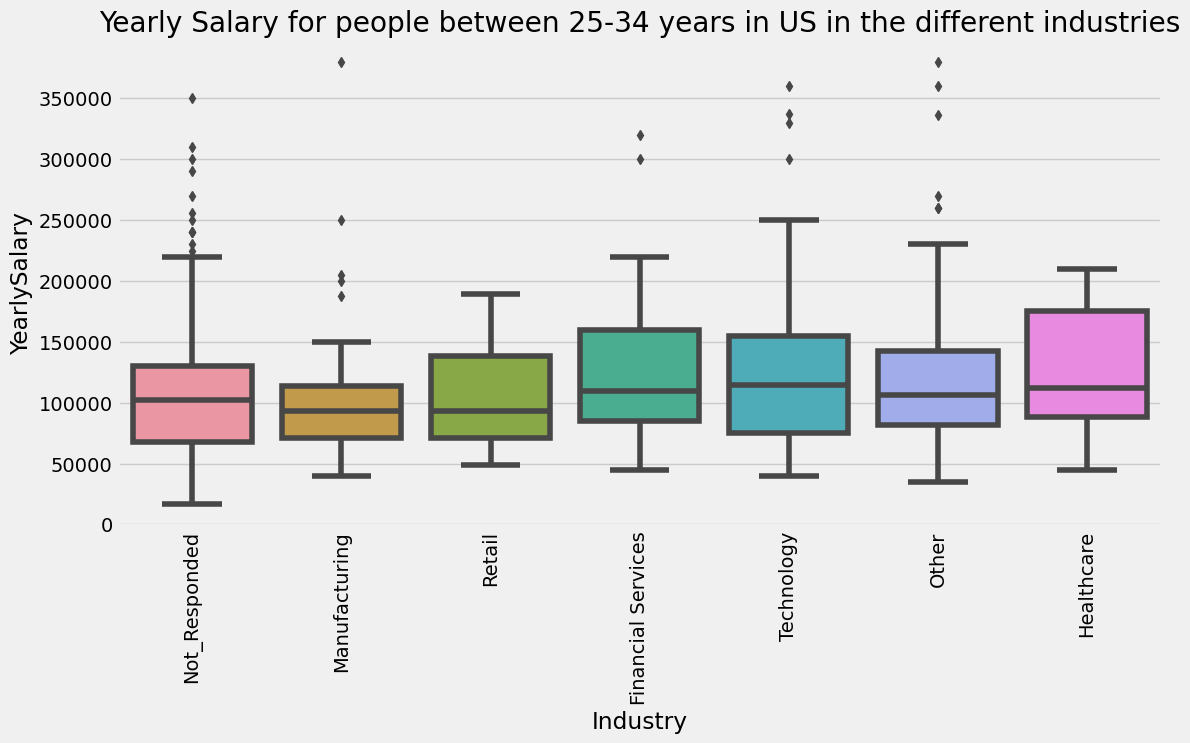

In [37]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
sns.boxplot(data=df6_inperson, x='Industry',y='YearlySalary')
plt.title('Yearly Salary for people between 25-34 years in US in the different industries')
plt.xticks(rotation=90)
plt.show()

Wow, Healthcare it's over all the other ones on in-person jobs. The graph for remote workers don't seems that changed too much

In [38]:
df6.isna().sum()

BuyNewTool        157
CurrentJob          1
EdLevel             0
Employment          0
Industry            0
MainBranch          0
OSPersonal         29
OSProffesional    160
RemoteWork          0
WorkingYears      895
YearlySalary        0
YearsCode           4
YearsCodePro        7
z_UsingAI           0
dtype: int64

I can't drop the "WorkingYears" column, because it's a very important feature for my model.  

<Axes: xlabel='WorkingYears', ylabel='Count'>

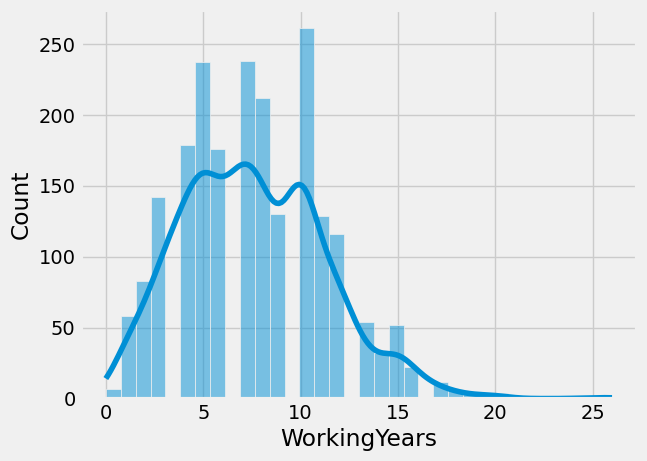

In [39]:
sns.histplot(data=df6, x='WorkingYears', kde=True)

It seems like a normal distribution. so I will just fill na values with the median. Or, should I fill them with the mean??

In [40]:
df6['WorkingYears'].describe()

count   2,155.00
mean        7.58
std         3.68
min         0.00
25%         5.00
50%         7.00
75%        10.00
max        26.00
Name: WorkingYears, dtype: float64

In [41]:
wypct = (df6['WorkingYears'].isna().sum()*100)/len(df6['WorkingYears'])

In [42]:
print((f"Percentage of missing values on WorkingYears: {wypct:.2f}"))

Percentage of missing values on WorkingYears: 29.34


I don't know if I should fill all these values with the median, it's a big pct. I don't want to drop the nan values neither, cuz again it's a big pct. And dropping the column is no negotiable, cuz it's one of my most important features.

In [43]:
df6.query("WorkingYears.isna()")

,BuyNewTool,CurrentJob,EdLevel,Employment,Industry,MainBranch,OSPersonal,OSProffesional,RemoteWork,WorkingYears,YearlySalary,YearsCode,YearsCodePro,z_UsingAI
1732,Start a free trial;Ask developers I know/work ...,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",Not_Responded,I am a developer by profession,MacOS;Ubuntu,MacOS;Ubuntu,0,NaN,"130,000.00",8.00,2.00,1
2715,Ask developers I know/work with;Visit develope...,Data scientist or machine learning specialist,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",Not_Responded,I am a developer by profession,Debian;Windows;Windows Subsystem for Linux (WSL),Debian,0,NaN,"130,000.00",4.00,3.00,0
2837,Start a free trial;Ask developers I know/work ...,"Developer, front-end",Some college/university study without earning ...,"Employed, full-time",Not_Responded,I am a developer by profession,Windows,NaN,0,NaN,"65,000.00",4.00,2.00,1
2958,Start a free trial;Ask developers I know/work ...,"Developer, embedded applications or devices","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",Not_Responded,I am a developer by profession,Windows,Windows,0,NaN,"80,000.00",9.00,0.00,0
4041,NaN,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",Not_Responded,I am a developer by profession,Windows,Windows,0,NaN,"141,000.00",9.00,4.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87526,Start a free trial,"Engineer, data","Secondary school (e.g. American high school, G...","Employed, full-time",Not_Responded,"I am not primarily a developer, but I write co...",Windows,MacOS,1,NaN,"127,000.00",1.00,0.00,1
87578,Start a free trial;Ask developers I know/work ...,"Developer, full-stack","Associate degree (A.A., A.S., etc.)","Employed, full-time",Not_Responded,I am a developer by profession,iOS;iPadOS;MacOS;Other Linux-based;Ubuntu;Windows,Windows,1,NaN,"110,000.00",12.00,7.00,0
87674,Start a free trial;Ask developers I know/work ...,"Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",Not_Responded,I am a developer by profession,MacOS,MacOS,1,NaN,"115,000.00",13.00,7.00,1
87726,Start a free trial,"Developer, full-stack","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Employed, full-time",Not_Responded,I am a developer by profession,Debian;MacOS,Debian;MacOS,1,NaN,"353,000.00",8.00,5.00,0


I know how to fill them!! I will use the "YearsCodePro" column, because, it's almost the same, isn't it?? And if there is still missing values, I will fill them with the median 😄

In [44]:
# Fill missing values in "WorkingYears" with values from "YearsCodePro" if available
df6['WorkingYears'].fillna(df6['YearsCodePro'], inplace=True)


/var/folders/xf/nkmp0gn94v1bjxp47j6nsslc0000gp/T/ipykernel_13112/2527759595.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['WorkingYears'].fillna(df6['YearsCodePro'], inplace=True)


In [45]:
df6.isna().sum()

BuyNewTool        157
CurrentJob          1
EdLevel             0
Employment          0
Industry            0
MainBranch          0
OSPersonal         29
OSProffesional    160
RemoteWork          0
WorkingYears        5
YearlySalary        0
YearsCode           4
YearsCodePro        7
z_UsingAI           0
dtype: int64

In [46]:
df.query("OSProffesional.isna()")

,Age,BuyNewTool,Country,CoursesCert,CurrentJob,EdLevel,Employment,Industry,MainBranch,OSPersonal,OSProffesional,ProfessionalTech,RemoteWork,TargetAIDeveloper,TargetAISearch,...,WorkedCollabTools,WorkedDatabase,WorkedFramework,WorkedLanguage,WorkedLibraries,WorkedPlatform,WorkedTools,WorkingYears,YearlySalary,YearsCode,YearsCodePro,z_BenefitsAI,z_FavorableAI,z_TrustAI,z_UsingAI
2222,25-34 years old,Start a free trial;Ask developers I know/work ...,United States of America,NaN,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",Retail and Consumer Services,I am a developer by profession,MacOS,NaN,Microservices;Observability tools;Continuous i...,In-person,GitHub Copilot,NaN,...,Android Studio;Visual Studio Code;Xcode,MySQL;PostgreSQL;Redis;Snowflake;Supabase,Next.js;Node.js;React,Bash/Shell (all shells);HTML/CSS;JavaScript;R;...,RabbitMQ;React Native,Amazon Web Services (AWS);Cloudflare;Firebase;...,Docker;Homebrew;npm;Vite;Webpack;Yarn,7.00,"135,000.00",7.00,7.00,Increase productivity;Greater efficiency,Favorable,Somewhat distrust,Yes
2837,25-34 years old,Start a free trial;Ask developers I know/work ...,United States of America,NaN,"Developer, front-end",Some college/university study without earning ...,"Employed, full-time",NaN,I am a developer by profession,Windows,NaN,NaN,In-person,NaN,NaN,...,Visual Studio Code,MySQL;PostgreSQL,Gatsby;Next.js;Node.js;React;WordPress,HTML/CSS;JavaScript;TypeScript,NaN,Firebase;Netlify;Vercel,npm;Vite;Webpack;Yarn,NaN,"65,000.00",4.00,2.00,Increase productivity;Greater efficiency;Speed...,Favorable,Somewhat trust,Yes
2986,25-34 years old,Start a free trial;Ask developers I know/work ...,United States of America,edX;Coursera,"Developer, back-end","Associate degree (A.A., A.S., etc.)","Employed, full-time",Financial Services,I am a developer by profession,Windows;Windows Subsystem for Linux (WSL),NaN,Automated testing;Observability tools;Continuo...,In-person,NaN,NaN,...,IntelliJ IDEA;IPython;Visual Studio;Visual Stu...,Microsoft SQL Server;PostgreSQL,Angular;AngularJS;Django;Flask,HTML/CSS;JavaScript;PHP;Python,NaN,NaN,Docker;Kubernetes,6.00,"65,000.00",10.00,6.00,Increase productivity;Greater efficiency,Indifferent,Neither trust nor distrust,Yes
10610,25-34 years old,Ask developers I know/work with;Visit develope...,United States of America,NaN,Student,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",NaN,"I am not primarily a developer, but I write co...",Android;Debian;Fedora;MacOS;Ubuntu,NaN,NaN,In-person,NaN,NaN,...,Android Studio;CLion;DataGrip;IntelliJ IDEA;Ju...,H2;MariaDB;MySQL;SQLite,Drupal;Flask;Spring Boot,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,NumPy;OpenGL;Pandas;Qt;Scikit-Learn;Spring Fra...,NaN,APT;Cargo;CMake;Composer;Docker;GNU GCC;Homebr...,NaN,"30,000.00",3.00,0.00,Speed up learning,Indifferent,Somewhat distrust,Yes
24372,25-34 years old,Visit developer communities like Stack Overflow,United States of America,NaN,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time",NaN,I am a developer by profession,Debian,NaN,NaN,In-person,NaN,NaN,...,Vim;Visual Studio Code,PostgreSQL,Vue.js,Bash/Shell (all shells);Go;HTML/CSS;JavaScript...,NaN,NaN,Docker;Pip;Webpack,NaN,"150,000.00",16.00,11.00,NaN,NaN,NaN,"No, and I don't plan to"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85928,25-34 years old,Start a free trial;Ask developers I know/work ...,United States of America,Codecademy;Udemy;Pluralsight,"Developer, front-end",Some college/university study without earning ...,"Employed, full-time",Advertising Services,I am a developer by profession,MacOS;Windows,NaN,DevOps function;Microservices;Innersource init...,Remote,NaN,NaN,...,Visual Studio Code,PostgreSQL,AngularJS;Node.js;Vue.js,HTML/CSS;JavaScript,NaN,Amazon Web Services (AWS),Composer;Docker;npm;Webpack;Yarn,11.00,"126,000.00",17.00,11.00,Incr

The same with this column

In [47]:
df6['OSProffesional'].fillna(df6['OSPersonal'], inplace=True)

/var/folders/xf/nkmp0gn94v1bjxp47j6nsslc0000gp/T/ipykernel_13112/1141065296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['OSProffesional'].fillna(df6['OSPersonal'], inplace=True)


In [48]:
df6['BuyNewTool']

110      Start a free trial;Ask developers I know/work ...
798      Start a free trial;Ask developers I know/work ...
1102     Start a free trial;Ask developers I know/work ...
1113     Ask developers I know/work with;Visit develope...
1421     Start a free trial;Ask developers I know/work ...
                               ...                        
87879    Start a free trial;Visit developer communities...
87910    Start a free trial;Ask developers I know/work ...
87938    Start a free trial;Read ratings or reviews on ...
87939    Start a free trial;Ask developers I know/work ...
87954                                                  NaN
Name: BuyNewTool, Length: 3050, dtype: object

I don't need this one tbh

In [49]:
df6.drop('BuyNewTool', axis='columns', inplace=True)

/var/folders/xf/nkmp0gn94v1bjxp47j6nsslc0000gp/T/ipykernel_13112/825400332.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop('BuyNewTool', axis='columns', inplace=True)


In [50]:
df7 = df6.dropna().copy()

In [51]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3013 entries, 110 to 87954
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CurrentJob      3013 non-null   object 
 1   EdLevel         3013 non-null   object 
 2   Employment      3013 non-null   object 
 3   Industry        3013 non-null   object 
 4   MainBranch      3013 non-null   object 
 5   OSPersonal      3013 non-null   object 
 6   OSProffesional  3013 non-null   object 
 7   RemoteWork      3013 non-null   int64  
 8   WorkingYears    3013 non-null   float64
 9   YearlySalary    3013 non-null   float64
 10  YearsCode       3013 non-null   float64
 11  YearsCodePro    3013 non-null   float64
 12  z_UsingAI       3013 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 329.5+ KB


Amazing! Isn't it?? Now I have a clean dataset to apply a classifier model n.n

In [52]:
df7['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           2850
I am not primarily a developer, but I write code sometimes as part of my work/studies     163
Name: count, dtype: int64

In [53]:
df7.rename(columns={'MainBranch':'Developer'}, inplace=True)

In [54]:
df7['Developer'] = df7['Developer'].apply(lambda x: 1 if x=='I am a developer by profession' else 0)

In [55]:
df7.Industry.value_counts()

Industry
Not_Responded         1197
Technology             691
Other                  440
Financial Services     227
Healthcare             184
Manufacturing          158
Retail                 116
Name: count, dtype: int64

In [56]:
df7['Employment'].value_counts()

Employment
Employed, full-time                                                                             2733
Employed, full-time;Independent contractor, freelancer, or self-employed                         174
Independent contractor, freelancer, or self-employed                                              84
Employed, full-time;Employed, part-time                                                            8
Employed, part-time                                                                                6
Independent contractor, freelancer, or self-employed;Employed, part-time                           6
Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time       2
Name: count, dtype: int64

I will drop this one, because almost all the data are employees

In [57]:
df7.drop('Employment', axis='columns', inplace=True)

In [58]:
df7['CurrentJob'].value_counts()

CurrentJob
Developer, full-stack                            1246
Developer, back-end                               543
Developer, front-end                              215
Developer, desktop or enterprise applications      94
Developer, embedded applications or devices        78
                                                 ... 
Database administrator                              6
Developer Advocate                                  6
Designer                                            5
Student                                             2
Marketing or sales professional                     2
Name: count, Length: 33, dtype: int64

In [59]:
df7.loc[df7['CurrentJob'].str.contains('Data')].shape

(94, 12)

They are almost not working on data u.u

In [60]:
df7['CurrentJob'] = df7['CurrentJob'].apply(lambda x: 'Data Science' if 'Data' in x else x)

In [61]:
top_jobs = df7['CurrentJob'].value_counts().nlargest(9).index
top_jobs

Index(['Developer, full-stack', 'Developer, back-end', 'Developer, front-end',
       'Developer, desktop or enterprise applications', 'Data Science',
       'Developer, embedded applications or devices', 'Developer, mobile',
       'Cloud infrastructure engineer', 'Engineer, data'],
      dtype='object', name='CurrentJob')

In [62]:
df7['CurrentJob'] = df7['CurrentJob'].apply(lambda x: 'Other' if x not in top_jobs else x)

In [63]:
df7['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          2046
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                        388
Some college/university study without earning a degree                                 315
Associate degree (A.A., A.S., etc.)                                                    122
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)      64
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                          60
Primary/elementary school                                                               10
Something else                                                                           8
Name: count, dtype: int64

In [64]:
df7['OSPersonal'].value_counts().nlargest(15)

OSPersonal
MacOS                                               525
Windows                                             496
MacOS;Windows                                       146
Ubuntu                                              123
Windows;Windows Subsystem for Linux (WSL)           113
Ubuntu;Windows                                       97
Ubuntu;Windows;Windows Subsystem for Linux (WSL)     82
Arch                                                 74
MacOS;Ubuntu                                         73
Android;Windows                                      69
iOS;MacOS                                            58
iOS;iPadOS;MacOS                                     48
MacOS;Windows;Windows Subsystem for Linux (WSL)      36
Other Linux-based                                    31
MacOS;Ubuntu;Windows                                 30
Name: count, dtype: int64

Perfect. There is just only left to handle with 'OSPersonal' and 'OSProffesional'. The way I will do it, is: I will create 7 values. 3 for each OS, 3 for each OS combination (eg. macos and linux) and 1 for the top 3 OS.  
I had a better idea:


In [65]:
df8 = df7.copy()

In [66]:
df8['MacOS'] = df8['OSPersonal'].apply(lambda x: 1 if 'MacOS' in x else 0)
df8['Linux'] = df8['OSPersonal'].apply(lambda x: 1 if 'Linux' in x or 'Fedora' in x or 'Debian' in x or 'Ubuntu' in x or 'Other Linux-based' in x else 0)
df8['Windows'] = df8['OSPersonal'].apply(lambda x: 1 if 'Windows' in x else 0)
df8['Other'] = df8['OSPersonal'].apply(lambda x: 1 if 'Other' in x else 0)

df8['MacOS_Prof'] = df8['OSProffesional'].apply(lambda x: 1 if 'MacOS' in x else 0)
df8['Linux_Prof'] = df8['OSProffesional'].apply(lambda x: 1 if 'Linux' in x or 'Fedora' in x or 'Debian' in x or 'Ubuntu' in x or 'Other Linux-based' in x else 0)
df8['Windows_Prof'] = df8['OSProffesional'].apply(lambda x: 1 if 'Windows' in x else 0)
df8['Other_Prof'] = df8['OSProffesional'].apply(lambda x: 1 if 'Other' in x else 0)



In [67]:
df8.head()

,CurrentJob,EdLevel,Industry,Developer,OSPersonal,OSProffesional,RemoteWork,WorkingYears,YearlySalary,YearsCode,YearsCodePro,z_UsingAI,MacOS,Linux,Windows,Other,MacOS_Prof,Linux_Prof,Windows_Prof,Other_Prof
110,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Not_Responded,1,Ubuntu;Windows;Windows Subsystem for Linux (WSL),Debian;Fedora;Ubuntu;Windows,0,7.00,"145,000.00",12.00,7.00,1,0,1,1,0,0,1,1,0
798,"Developer, full-stack",Some college/university study without earning ...,Manufacturing,1,Windows,Windows,0,15.00,"50,000.00",9.00,6.00,0,0,0,1,0,0,0,1,0
1102,Other,Some college/university study without earning ...,Manufacturing,0,Ubuntu;Windows;Windows Subsystem for Linux (WSL),Debian;Windows;Windows Subsystem for Linux (WSL),0,5.00,"40,000.00",9.00,5.00,0,0,1,1,0,0,1,1,0
1113,"Developer, desktop or enterprise applications",Something else,Manufacturing,1,Android;Windows;Windows Subsystem for Linux (WSL),Debian;Ubuntu;Windows,0,5.00,"110,000.00",6.00,5.00,0,0,1,1,0,0,1,1,0
1421,"Developer, full-stack","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Not_Responded,1,iOS;iPadOS;MacOS;Windows,Windows,0,9.00,"130,000.00",12.00,9.00,0,1,0,1,0,0,0,1,0


Perfect I will use a decision tree based model, they don't care if the data is ordinal or nominal. I can do label encoder for them

In [68]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3013 entries, 110 to 87954
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CurrentJob      3013 non-null   object 
 1   EdLevel         3013 non-null   object 
 2   Industry        3013 non-null   object 
 3   Developer       3013 non-null   int64  
 4   OSPersonal      3013 non-null   object 
 5   OSProffesional  3013 non-null   object 
 6   RemoteWork      3013 non-null   int64  
 7   WorkingYears    3013 non-null   float64
 8   YearlySalary    3013 non-null   float64
 9   YearsCode       3013 non-null   float64
 10  YearsCodePro    3013 non-null   float64
 11  z_UsingAI       3013 non-null   int64  
 12  MacOS           3013 non-null   int64  
 13  Linux           3013 non-null   int64  
 14  Windows         3013 non-null   int64  
 15  Other           3013 non-null   int64  
 16  MacOS_Prof      3013 non-null   int64  
 17  Linux_Prof      3013 non-null   int

Thinking again, I will drop the professional column, cuz, tbh, It's almost the same! And I dont want 4 columns more!!

In [69]:
df8.drop(['OSPersonal','OSProffesional'], axis='columns', inplace=True)
df8.drop(['MacOS_Prof','Linux_Prof','Windows_Prof','Other_Prof'], axis='columns', inplace=True)

### Our data is ready!! n.n
Go to the 'models' folder in src if you want to observe the training process!

<Axes: >

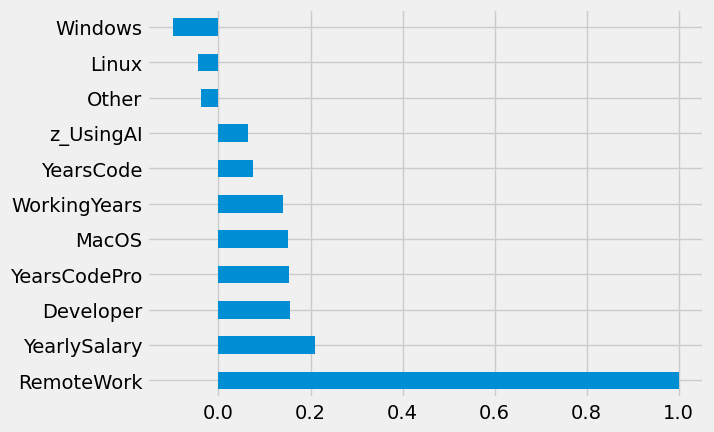

In [70]:
df8.select_dtypes(include='number').corr()['RemoteWork'].sort_values(ascending=False).plot(kind='barh')

Do this graph is telling us that macos users tend to work more in remote??

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier

In [75]:

X = df8.drop("RemoteWork", axis=1)
y = df8["RemoteWork"]
X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.8, random_state=42)

In [76]:
num_features = X_train.select_dtypes(include="number").columns
num_transformer = Pipeline(steps=[("scaler", StandardScaler())])
cat_features = X_train.select_dtypes(include="object").columns
cat_transformer = Pipeline(steps=[("OHE", OneHotEncoder(handle_unknown="ignore"))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_features),
    ]
)

In [77]:
rf_model = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", RandomForestClassifier())]
)
rf_model.fit(X_train, y_train)
rf_model.score(X_test, y_test)

0.8175787728026535

In [78]:
confusion_matrix(y_test, rf_model.predict(X_test))



array([[ 15,  95],
       [ 15, 478]])

In [79]:
param_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [5, 10, 15],
    "classifier__min_samples_split": [2, 5],
    "classifier__min_samples_leaf": [1, 2],
}

grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, verbose=10, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)
grid_search_rf.score(X_test, y_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 4/5; 1/36] START classifier__max_depth=5, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100
[CV 3/5; 1/36] START classifier__max_depth=5, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100
[CV 1/5; 1/36] START classifier__max_depth=5, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100
[CV 2/5; 1/36] START classifier__max_depth=5, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100
[CV 1/5; 1/36] END classifier__max_depth=5, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.861 total time=   0.6s
[CV 2/5; 1/36] END classifier__max_depth=5, classifier__min_samples_leaf=1, classifier__min_samples_split=2, classifier__n_estimators=100;, score=0.861 total time=   0.6s
[CV 3/5; 1/36] END classifier__max_d

0.8225538971807629

In [88]:
cm_test = confusion_matrix(y_test, grid_search_rf.predict(X_test))

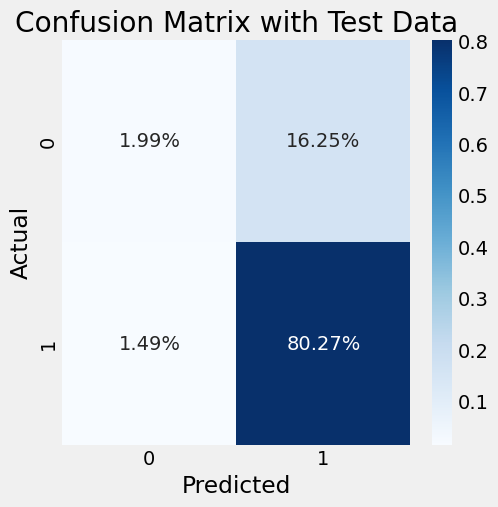

In [101]:
# create a heatmap with the cm_test values
plt.figure(figsize=(5,5))
sns.heatmap(cm_test/np.sum(cm_test), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix with Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [96]:
cm_train = confusion_matrix(y_train, grid_search_rf.predict(X_train))

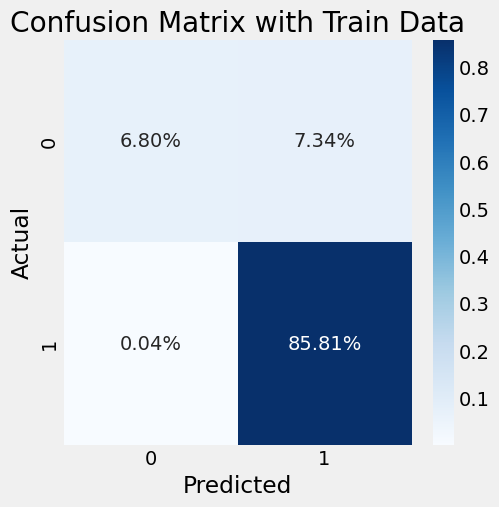

In [100]:
# create a heatmap with the cm_test values
plt.figure(figsize=(5,5))
sns.heatmap(cm_train/np.sum(cm_train), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix with Train Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [85]:
df8['RemoteWork'].value_counts()

RemoteWork
1    2562
0     451
Name: count, dtype: int64

### CONCLUSION
As you can see, the model is performing very well predicting the Remote Workers, but it's hard to classify the In-Person workers. In our test data we almost predicted just 1/9!! It is unacceptable. More data will not be useful, because our training data is performing bad, it has high bias. I think, the problem was the difference between the percentage of both classifications:

In [103]:
df8['RemoteWork'].value_counts(normalize=True) * 100

RemoteWork
1   85.03
0   14.97
Name: proportion, dtype: float64

I could use techniques like 'SMOTE', or give less weight to a class within RandomForestClassifier(), but to be honest, I would like to focus my attention on the next project: **Prediction of your salary based on your data!!**

For now I will leave the project like this, perhaps in the future I will take it up again. It should be mentioned that I am learning a lot, and with the next regression model I will finally conclude with this project

Thank's for your attention!! 😄